In [1]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.0 MB/s eta 0:00:00


In [2]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=a0b040f3d20cbf69f8175122abf5f0c1e7650a92dd025068eb68acdbaee5301e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import shap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

## Importamos los datos

In [4]:
##### Para importar Give me some credit

#import gdown
#import pandas as pd

#url = 'https://drive.google.com/uc?id=13RlWpizJ5Xj0Zss6w_W1YOMgQPtBlg1s'
#output = 'mi_archivo.csv'
#gdown.download(url, output, quiet=False)

#df = pd.read_csv(output)


In [5]:
##### Para importar RSD4
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=13q0rZ8nx2coIots4a3R4cXPBSUF2a0zY'
output = 'mi_archivo.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=13q0rZ8nx2coIots4a3R4cXPBSUF2a0zY
To: /content/mi_archivo.csv
100%|██████████| 23.2M/23.2M [00:00<00:00, 190MB/s]


## Explorar los datos

In [6]:
df.head()

target_default   score_3   score_4   score_5   score_6  risk_rate  \
0             0.0  0.032154  0.563484 -0.832617  0.848870   1.039282   
1             0.0  0.213805 -0.924750  1.538588 -0.789902  -0.536149   
2             1.0  0.122980  0.006361 -0.512003  1.294382  -0.043827   
3             0.0  1.485366  0.500243  1.694857 -0.500560   0.251567   
4             0.0  1.394540 -0.481355  0.114978  1.816579  -1.126935   

   last_amount_borrowed  last_borrowed_in_months    income  facebook_profile  \
0              2.627224                  1.11413 -0.116075                 1   
1             -0.577743                 -0.68792  0.553756                 0   
2              0.345051                  1.11413 -0.115893                 0   
3             -0.577743                 -0.68792 -0.043057                 0   
4             -0.577743                 -0.68792 -0.211806                 1   

   ...  shipping_state_BR-PE  shipping_state_BR-PR  shipping_state_BR-RN  \
0  ...                     0                     0                     0   
1  ...                     0                     0                     0   
2  ...                     0                     0                     0   
3  ...                     0                     0                     1   
4  ...                     0                     0                     0   

   shipping_state_BR-RO  shipping_state_BR-RR  shipping_state_BR-RS  \
0                     0                     0                     0   
1                     0                     0                     1   
2                     0                     1                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   shipping_state_BR-SC  shipping_state_BR-SE  shipping_state_BR-SP  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   shipping_state_BR-TO  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 106 columns]

In [7]:
df.describe()

target_default       score_3       score_4       score_5       score_6  \
count    41741.000000  4.174100e+04  4.174100e+04  4.174100e+04  4.174100e+04   
mean         0.159579 -1.404156e-16 -1.359600e-15 -1.608641e-16 -7.200584e-17   
std          0.366220  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min          0.000000 -3.146747e+00 -4.339255e+00 -1.733471e+00 -3.916791e+00   
25%          0.000000 -6.944521e-01 -6.734986e-01 -8.602449e-01 -6.721703e-01   
50%          0.000000 -5.867193e-02  3.496056e-03  2.630495e-03  5.824409e-03   
75%          0.000000  6.679340e-01  6.709880e-01  8.616107e-01  6.696470e-01   
max          1.000000  5.845001e+00  4.388306e+00  1.737555e+00  4.217775e+00   

          risk_rate  last_amount_borrowed  last_borrowed_in_months  \
count  4.174100e+04          4.174100e+04             4.174100e+04   
mean   3.421554e-17         -5.191910e-18            -7.575082e-17   
std    1.000012e+00          1.000012e+00             1.000012e+00   
min   -2.899294e+00         -5.777428e-01            -6.879198e-01   
25%   -7.330775e-01         -5.777428e-01            -6.879198e-01   
50%   -4.382670e-02         -5.777428e-01            -6.879198e-01   
75%    6.454241e-01          3.838015e-01             1.114130e+00   
max    5.962502e+00          3.910761e+00             2.315496e+00   

             income  facebook_profile  ...  shipping_state_BR-PE  \
count  4.174100e+04      41741.000000  ...          41741.000000   
mean  -2.382321e-16          0.333844  ...              0.028916   
std    1.000012e+00          0.471591  ...              0.167574   
min   -1.267891e+00          0.000000  ...              0.000000   
25%   -5.178143e-01          0.000000  ...              0.000000   
50%   -2.111788e-01          0.000000  ...              0.000000   
75%    2.669920e-01          1.000000  ...              0.000000   
max    9.431740e+01          1.000000  ...              1.000000   

       shipping_state_BR-PR  shipping_state_BR-RN  shipping_state_BR-RO  \
count          41741.000000          41741.000000          41741.000000   
mean               0.030138              0.028940              0.030234   
std                0.170970              0.167641              0.171233   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       shipping_state_BR-RR  shipping_state_BR-RS  shipping_state_BR-SC  \
count          41741.000000          41741.000000          41741.000000   
mean               0.035864              0.030234              0.028940   
std                0.185953              0.171233              0.167641   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       shipping_state_BR-SE  shipping_state_BR-SP  shipping_state_BR-TO  
count          41741.000000          41741.000000          41741.000000  
mean               0.031552              0.155602              0.030713  
std                0.174805              0.362482              0.172542  
min                0.000000              0.000000              0.000000  
25%                0.000000              0.000000              0.000000  
50%                0.000000              0.000000              0.000000  
75%                0.000000              0.000000              0.000000  
max                1.000000              1.000000              1.000000  

[8 rows x 106 

In [8]:
df.dtypes

target_default          float64
score_3                 float64
score_4                 float64
score_5                 float64
score_6                 float64
                         ...   
shipping_state_BR-RS      int64
shipping_state_BR-SC      int64
shipping_state_BR-SE      int64
shipping_state_BR-SP      int64
shipping_state_BR-TO      int64
Length: 106, dtype: object

In [9]:
### 106 columnas. Muchas de ellas binarias (88)
### Vamos a ver la correlación entre las no binarias

non_binary_columns = []
for column in df.columns:
    if df[column].nunique() > 2:
        non_binary_columns.append(column)

df[non_binary_columns].corr()

score_3   score_4   score_5  \
score_3                                          1.000000 -0.001179  0.001647   
score_4                                         -0.001179  1.000000  0.008684   
score_5                                          0.001647  0.008684  1.000000   
score_6                                         -0.002400  0.004547  0.003413   
risk_rate                                        0.044820 -0.005861  0.001111   
last_amount_borrowed                             0.013080  0.003422 -0.008013   
last_borrowed_in_months                          0.008408  0.002767 -0.008155   
income                                          -0.109759 -0.002408 -0.003057   
ok_since                                         0.015766  0.010383  0.000815   
n_bankruptcies                                  -0.025203 -0.007264  0.004647   
n_defaulted_loans                               -0.011313 -0.002488 -0.002660   
n_accounts                                       0.192905 -0.008531  0.006279   
n_issues                                         0.193279 -0.007939  0.001478   
application_time_in_funnel                       0.003227  0.002639  0.006210   
external_data_provider_credit_checks_last_month  0.000731  0.003987  0.001366   
external_data_provider_email_seen_before        -0.010214 -0.003918  0.003032   
external_data_provider_fraud_score               0.001861 -0.003493 -0.002761   
reported_income                                  0.000559  0.009081 -0.004170   

                                                  score_6  risk_rate  \
score_3                                         -0.002400   0.044820   
score_4                                          0.004547  -0.005861   
score_5                                          0.003413   0.001111   
score_6                                          1.000000   0.003323   
risk_rate                                        0.003323   1.000000   
last_amount_borrowed                             0.005458   0.024678   
last_borrowed_in_months                          0.001504   0.026659   
income                                           0.013329   0.000305   
ok_since                                        -0.006770  -0.013828   
n_bankruptcies                                   0.006616   0.031151   
n_defaulted_loans                                0.006585   0.011276   
n_accounts                                      -0.005090   0.017114   
n_issues                                        -0.000792   0.067853   
application_time_in_funnel                       0.000829  -0.002549   
external_data_provider_credit_checks_last_month  0.005298   0.004484   
external_data_provider_email_seen_before        -0.001466  -0.003701   
external_data_provider_fraud_score               0.001096  -0.000404   
reported_income                                  0.003624  -0.002829   

                                                 last_amount_borrowed  \
score_3                                                      0.013080   
score_4                                                      0.003422   
score_5                                                     -0.008013   
score_6                                                      0.005458   
risk_rate                                                    0.024678   
last_amount_borrowed                                         1.000000   
last_borrowed_in_months                                      0.837012   
income                                                       0.120303   
ok_since                                                    -0.004054   
n_bankruptcies                                              -0.024235   
n_defaulted_loans                                            0.002412   
n_accounts                                                   0.068551   
n_issues                                                     0.061466   
application_time_in_funnel                                  -0.000217   
external_data_provider_credit_checks_last_mont

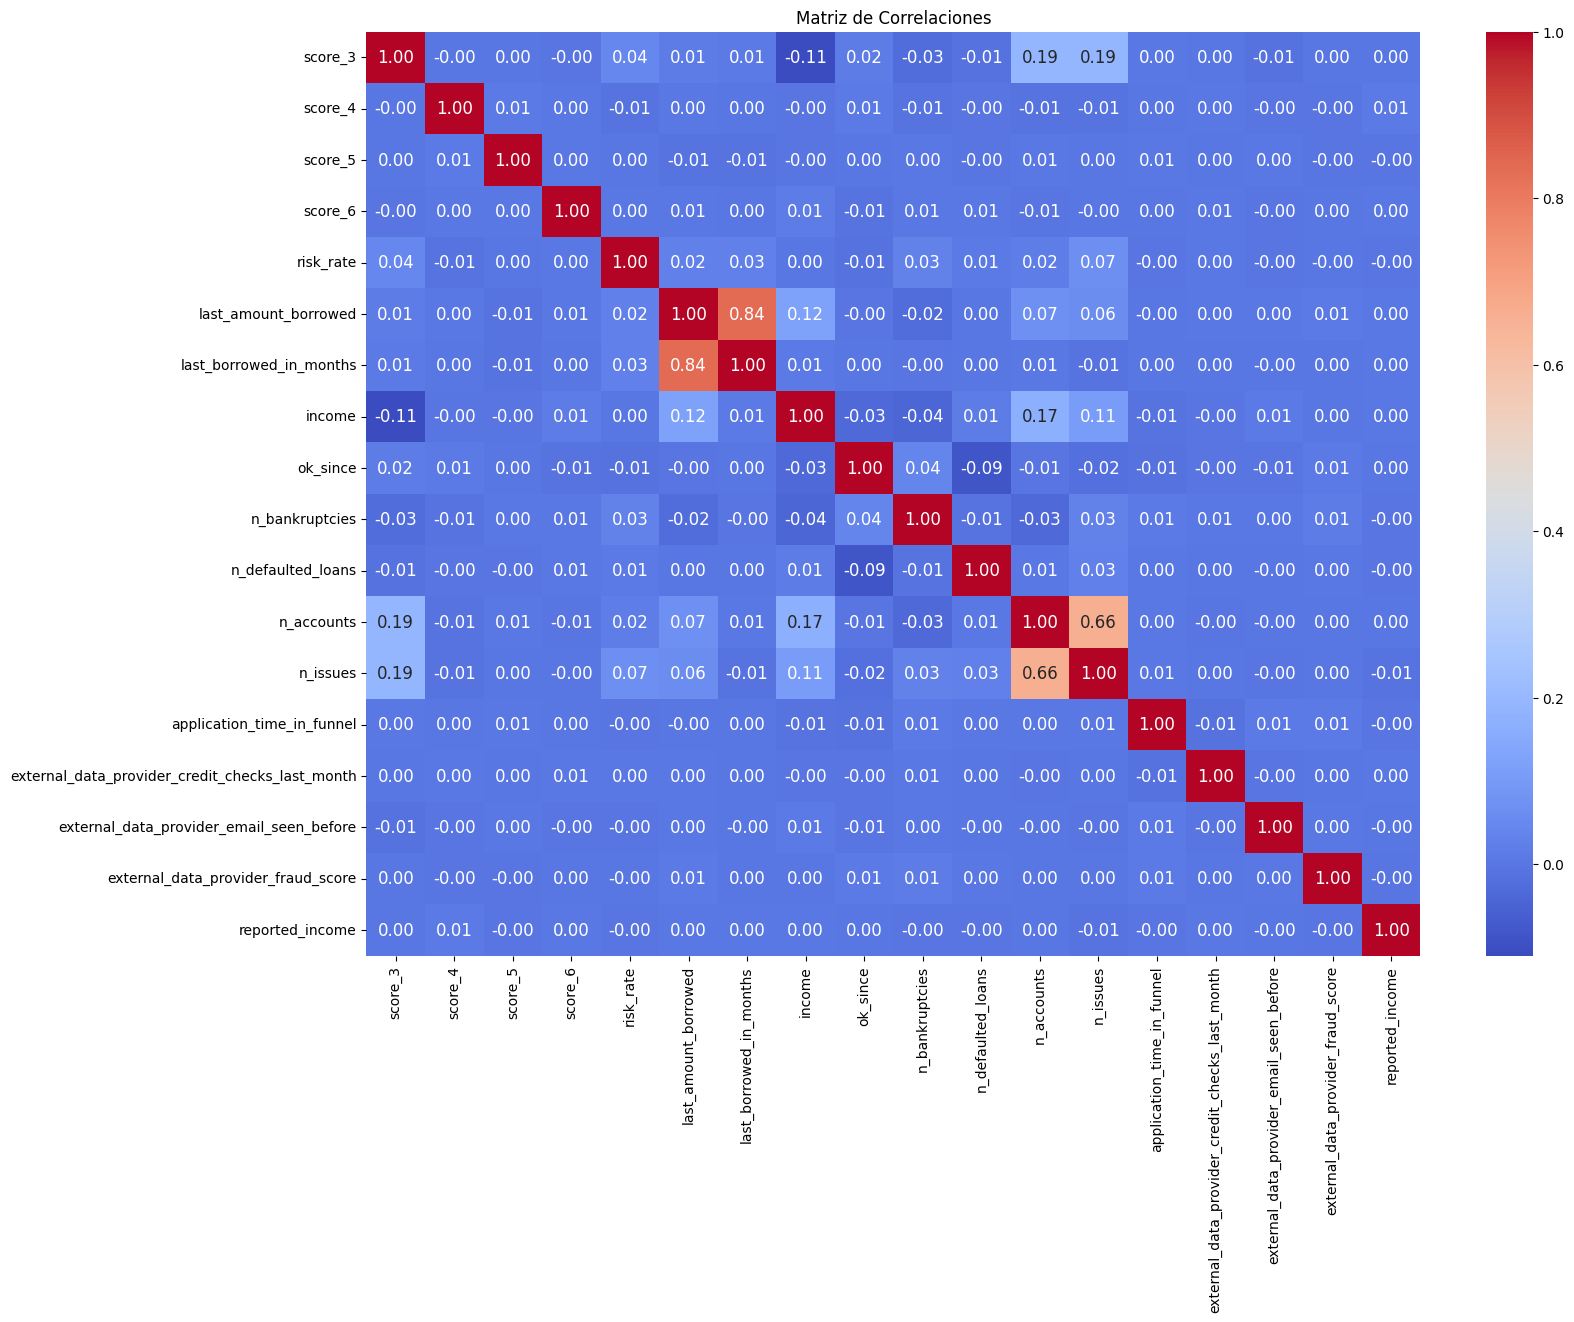

In [10]:
### Vamos a ver la correlación de forma más estilosa
plt.figure(figsize=(17, 12))
sns.heatmap(df[non_binary_columns].corr(), annot=True, fmt='.2f', annot_kws={'size': 12}, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()


## Rebalanceo de defaults (opcional)

In [11]:
##### Rebalanceo con SMOTE

from imblearn.over_sampling import SMOTE

Sana = df[df['target_default'] == 0]
Mora = df[df['target_default'] == 1]

# Determinar la proporción de rebalanceo deseada
proporcion_rebalanceo = 0.5

# Aplicar SMOTE con la proporción deseada
smote = SMOTE(sampling_strategy=proporcion_rebalanceo)
X_resampled, y_resampled = smote.fit_resample(df.drop('target_default', axis=1), df['target_default'])

RDS_balanceado = pd.DataFrame(X_resampled, columns=df.drop('target_default', axis=1).columns)
RDS_balanceado['target_default'] = y_resampled

X = RDS_balanceado.drop('target_default', axis=1)
y = RDS_balanceado['target_default']

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [12]:
##### Balanceo como lo hicieron en la clase anterior

from sklearn.utils import resample

Sana = df[df['target_default'] == 0]
Mora = df[df['target_default'] == 1]

mora_balanceada = resample(Mora, replace=True, n_samples=35080)

RDS_balanceado = pd.concat([Sana, mora_balanceada])

X = RDS_balanceado.drop('target_default', axis=1)
y = RDS_balanceado['target_default']


## Preprocesamiento y sin balanceo

In [13]:
#### Sin balancear
X = df.drop('target_default', axis=1)
y = df['target_default']


In [14]:
y.value_counts()

0.0    35080
1.0     6661
Name: target_default, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logit

In [16]:
loaded_logit      = LogisticRegression().fit(X_train, y_train)
predictions_logit = loaded_logit.predict_proba(X_test) 
roc               = roc_auc_score(y_test, predictions_logit[:,1])
print(roc)


0.7109775195999835


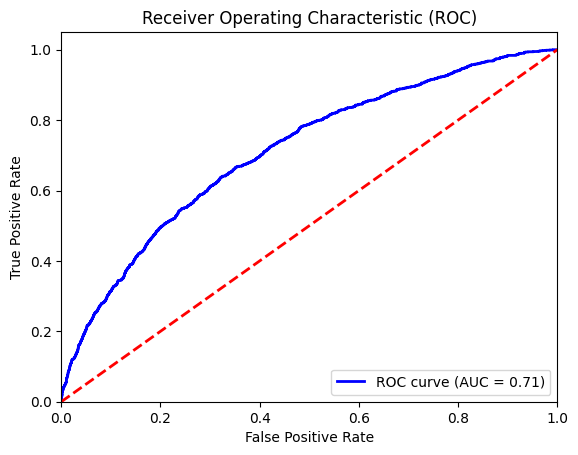

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_logit[:,1])

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [18]:
####### Vamos a ver la confussion matrix

from sklearn.metrics import confusion_matrix

umbral   = 0.2

# Apply the threshold to obtain the predicted classes
predicted_classes = (predictions_logit[:,1] >= umbral).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5393 1588]
 [ 656  712]]


In [19]:
####### Vamos a ver roc, y otras medidas, pero para esas necesitamos un umbral!

#threshold  = np.mean(y_train)
umbral   = 0.2
roc         = roc_auc_score(y_test, predictions_logit[:,1])
accuracy    = accuracy_score(y_test, np.where(predictions_logit[:,1] > umbral, 1, 0)) 
precision   = precision_score(y_test, np.where(predictions_logit[:,1] > umbral, 1, 0)) 
recall      = recall_score(y_test, np.where(predictions_logit[:,1] > umbral, 1, 0)) 
f1          = f1_score(y_test,np.where(predictions_logit[:,1] > umbral, 1, 0)) 
print('roc:{}, accuracy:{}, precision:{}, recall:{}, f1:{}'.format(roc, accuracy, precision, recall, f1))  

roc:0.7109775195999835, accuracy:0.7312252964426877, precision:0.3095652173913043, recall:0.52046783625731, f1:0.3882224645583425


In [20]:
####### Vamos a elegir el umbral de default de forma "óptima"

import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve

# Get precision, recall, and corresponding thresholds
precision, recall, thresholds = precision_recall_curve(y_test, predictions_logit[:, 1])

# Calculate F1 score using precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the index of the maximum F1 score
best_index = np.argmax(f1_scores)

# Obtain the best threshold
best_threshold = thresholds[best_index]

# Use the best threshold to obtain final predictions
final_predictions = np.where(predictions_logit[:, 1] > best_threshold, 1, 0)

# Print the best F1 score and corresponding threshold
best_f1 = f1_scores[best_index]
print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.3944315545243619
Best threshold: 0.21223887375890987


In [21]:
####### Vamos a ver los coeficientes de logit

coefficients = loaded_logit.coef_[0]
magnitudes = abs(coefficients)

# Create a DataFrame with the coefficients and magnitudes
df_coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Magnitude': magnitudes})

# Sort the DataFrame by magnitude in descending order
df_coeffs = df_coeffs.sort_values(by='Magnitude', ascending=False)

# Reset the index of the DataFrame
df_coeffs = df_coeffs.reset_index(drop=True)

# Print the DataFrame
print(df_coeffs)

                                      Feature  Coefficient  Magnitude
0                            facebook_profile     0.391782   0.391782
1                                      income    -0.220912   0.220912
2                                   score_1_1    -0.197663   0.197663
3    external_data_provider_email_seen_before    -0.183417   0.183417
4                                  score_2_23    -0.145412   0.145412
..                                        ...          ...        ...
100                                   score_4    -0.001920   0.001920
101        external_data_provider_fraud_score    -0.001834   0.001834
102                      shipping_state_BR-MA     0.001254   0.001254
103                      shipping_state_BR-PE     0.000662   0.000662
104                                   score_6     0.000173   0.000173

[105 rows x 3 columns]


## Lasso

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score

# Create Lasso regression model with alpha=0.5
lasso = Lasso(alpha=0.005)

# Fit the model with training data
lasso.fit(X_train, y_train)

# Predict probabilities on test data
# Nos da directamente la prob=1, no necesitamos hacer lo que hicimos en logit
predictions_lasso = lasso.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_lasso)

# Print the ROC AUC score
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.706226319391565


In [23]:
coefficients = lasso.coef_
magnitudes = abs(coefficients)

# Create a DataFrame with the coefficients and magnitudes
df_coeffs = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Magnitude': magnitudes})

# Sort the DataFrame by magnitude in descending order
df_coeffs = df_coeffs.sort_values(by='Magnitude', ascending=False)

# Reset the index of the DataFrame
df_coeffs = df_coeffs.reset_index(drop=True)

# Print the DataFrame
print(df_coeffs.loc[df_coeffs['Magnitude']>0,])

                                     Feature  Coefficient  Magnitude
0                           facebook_profile     0.047954   0.047954
1                                  score_1_1    -0.040868   0.040868
2                                  score_1_3    -0.029252   0.029252
3                                  score_1_6     0.025624   0.025624
4                                  score_1_4     0.019809   0.019809
5   external_data_provider_email_seen_before    -0.018397   0.018397
6                                  score_1_5     0.012585   0.012585
7                          email_outlook.com     0.011919   0.011919
8                                     income    -0.009061   0.009061
9                                  score_1_2     0.008970   0.008970
10                 marketing_channel_Website     0.006096   0.006096
11                                 score_2_2    -0.005980   0.005980
12                                   score_3     0.005899   0.005899
13                      shipping_s

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import roc_auc_score

# Create ElasticNet regression model with alpha=0.5
elasticnet = ElasticNet(alpha=0.005, l1_ratio=0.5)  # l1_ratio controla la proporción L1 y L2

# Fit the model with training data
elasticnet.fit(X_train, y_train)

# Predict probabilities on test data
predictions_elasticnet = elasticnet.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions_elasticnet)

# Print the ROC AUC score
print("ROC AUC score:", roc_auc)

ROC AUC score: 0.7085296682473983


## Tree

In [25]:
################################################################ Arbol sencillo  
model            = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
loaded_arbol     = model.fit(X_train, y_train)
predictions_tree = loaded_arbol.predict_proba(X_test) 
roc_auc_score(y_test, predictions_tree[:,1])

0.6407970548296924

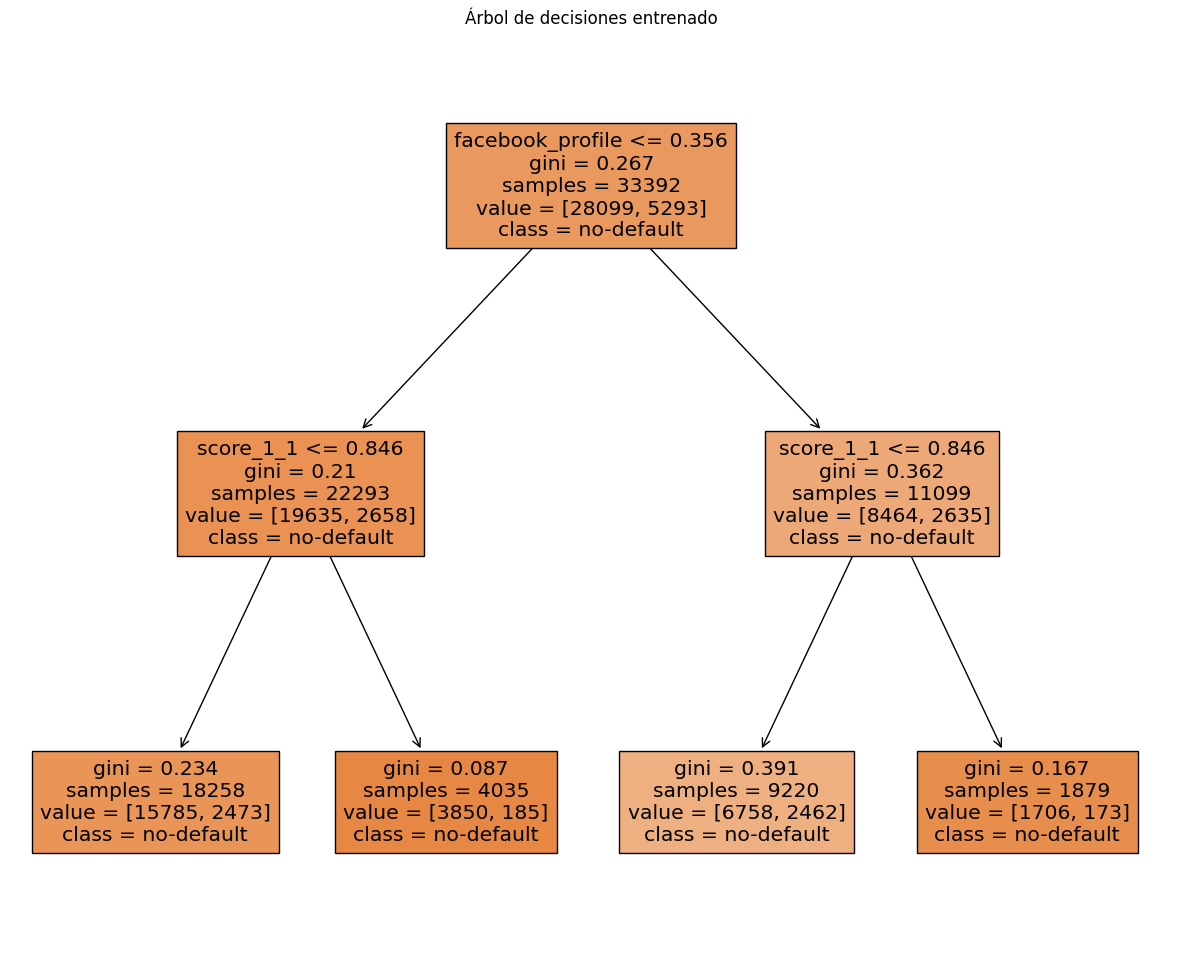

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

class_names = ["no-default", "default"]
plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura (en pulgadas)
plt.rcParams.update({'font.size': 10})  # Ajusta el tamaño de fuente

# Genera el árbol de decisiones
plot_tree(loaded_arbol, filled=True, feature_names=X.columns, class_names=class_names)

plt.title("Árbol de decisiones entrenado")
plt.show()

## XGBoost

In [27]:
import xgboost as xgb


In [28]:
model_train    = xgb.XGBClassifier(n_estimators=200, max_depth=2, learning_rate = 0.1)
loaded_xgb     = model_train.fit(X_train, y_train)
prediction_xgb = loaded_xgb.predict_proba(X_test)    
roc            = roc_auc_score(y_test, prediction_xgb[:,1])
print(roc)

0.725155308770422


In [29]:
####### Vamos a ver la confussion matrix

from sklearn.metrics import confusion_matrix

umbral      = 0.2

# Apply the threshold of 0.1 to obtain the predicted classes
predicted_classes = (prediction_xgb[:,1] >= umbral).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5474 1507]
 [ 642  726]]


In [30]:
####### Vamos a ver roc, y otras medidas, pero para esas necesitamos un umbral!

#umbral      = np.mean(y_train)
umbral      = 0.2

roc         = roc_auc_score(y_test, prediction_xgb[:,1])
accuracy    = accuracy_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
precision   = precision_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
recall      = recall_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
f1          = f1_score(y_test,np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
print('roc:{}, accuracy:{}, precision:{}, recall:{}, f1:{}'.format(roc, accuracy, precision, recall, f1))    


roc:0.725155308770422, accuracy:0.7426039046592406, precision:0.3251231527093596, recall:0.5307017543859649, f1:0.40322132740905303


In [63]:
####### XGB tiene muchos hiper parámetros. ¿Cómo elegirlos?

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

modelo = xgb.XGBClassifier(objective="binary:logistic")

parametros_a_buscar = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
}

In [64]:
grid_search = GridSearchCV(modelo, parametros_a_buscar, cv=3, scoring='roc_auc')

grid_search.fit(X, y)      

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [65]:
print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor AUC: {grid_search.best_score_}")

Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Mejor AUC: 0.7235576555033808


## Problema de overfitting

1
2
3
4
5
6
7
8
9


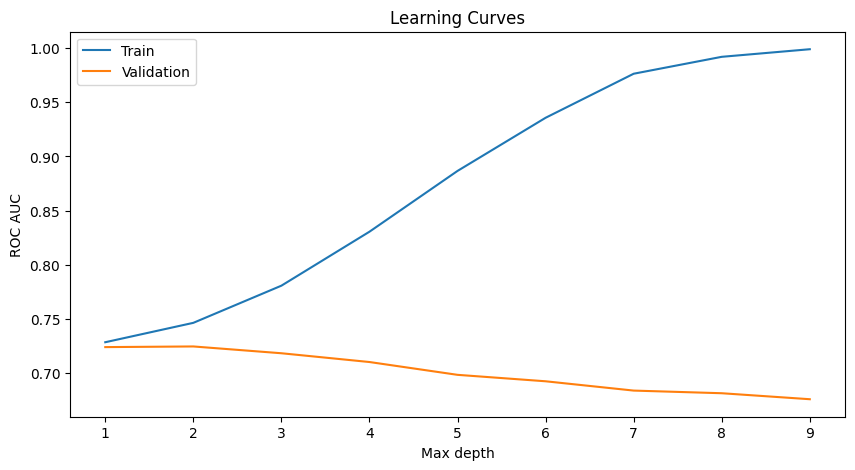

In [31]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Listas para guardar los puntajes de entrenamiento y validación
train_scores = []
val_scores = []

# Rango de valores de max_depth que vamos a probar
max_depths = np.arange(1, 10)

for max_depth in max_depths:
    print(max_depth)
    model = xgb.XGBClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Calcula la puntuación ROC AUC para el conjunto de entrenamiento
    y_train_proba = model.predict_proba(X_train)[:, 1]
    train_score = roc_auc_score(y_train, y_train_proba)
    train_scores.append(train_score)

    # Calcula la puntuación ROC AUC para el conjunto de validación
    y_val_proba = model.predict_proba(X_test)[:, 1]
    val_score = roc_auc_score(y_test, y_val_proba)
    val_scores.append(val_score)

# Graficar las curvas de aprendizaje
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label='Train')
plt.plot(max_depths, val_scores, label='Validation')
plt.xlabel('Max depth')
plt.ylabel('ROC AUC')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Problema running time

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190


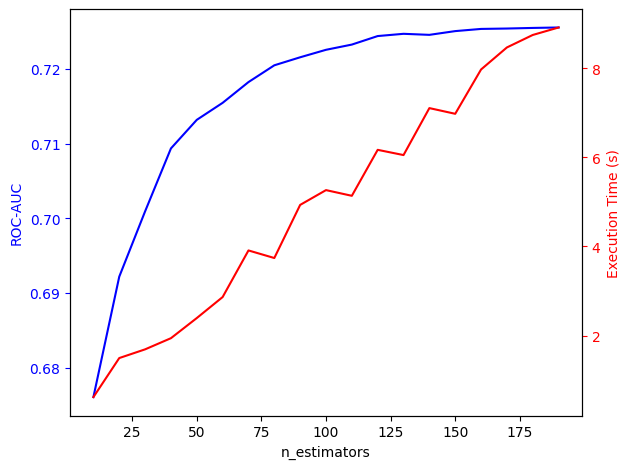

In [32]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

n_estimators_list = np.arange(10, 200, 10)  # Valores de n_estimators que quieres probar

roc_auc_scores = []
execution_times = []

for n_estimators in n_estimators_list:
    print(n_estimators)
    # Crear y ajustar el modelo con el valor actual de n_estimators
    model_train = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=2, learning_rate=0.1)
    start_time = time.time()
    loaded_xgb = model_train.fit(X_train, y_train)
    end_time = time.time()

    # Calcular las predicciones y el ROC-AUC
    predictions = loaded_xgb.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, predictions[:, 1])

    # Guardar los resultados
    roc_auc_scores.append(roc_auc)
    execution_times.append(end_time - start_time)

# Graficar los resultados
fig, ax1 = plt.subplots()

# Plot ROC-AUC en el eje izquierdo
ax1.plot(n_estimators_list, roc_auc_scores, 'b-')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('ROC-AUC', color='b')
ax1.tick_params('y', colors='b')

# Crear eje derecho para el tiempo de ejecución
ax2 = ax1.twinx()
ax2.plot(n_estimators_list, execution_times, 'r-')
ax2.set_ylabel('Execution Time (s)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## Random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

model_train = RandomForestClassifier(n_estimators=100, max_depth=3)
loaded_rf   = model_train.fit(X_train, y_train)
predictions_rf = loaded_rf.predict_proba(X_test)

umbral       = np.mean(y_train)
roc         = roc_auc_score(y_test, predictions_rf[:,1])
accuracy    = accuracy_score(y_test, np.where(predictions_rf[:,1] > umbral, 1, 0)) 
precision   = precision_score(y_test, np.where(predictions_rf[:,1] > umbral, 1, 0)) 
recall      = recall_score(y_test, np.where(predictions_rf[:,1] > umbral, 1, 0)) 
f1          = f1_score(y_test,np.where(predictions_rf[:,1] > umbral, 1, 0)) 
print('roc:{}, accuracy:{}, precision:{}, recall:{}, f1:{}'.format(roc, accuracy, precision, recall, f1))  

roc:0.7083528097568086, accuracy:0.6108515989938915, precision:0.25501432664756446, recall:0.7156432748538012, f1:0.3760322642596504


## Khandiani

In [34]:
model            = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
loaded_arbol     = model.fit(X_train, y_train)
predictions_tree = loaded_arbol.predict_proba(X_test) 
roc              = roc_auc_score(y_test, predictions_tree[:,1])
print('roc:{}'.format(roc))    

loaded_logit      = LogisticRegression().fit(X_train, y_train)
predictions_logit = loaded_logit.predict_proba(X_test) 
roc               = roc_auc_score(y_test, predictions_logit[:,1])
print('roc:{}'.format(roc))    

model_train     = xgb.XGBClassifier(n_estimators=200, max_depth=2, learning_rate = 0.1)
loaded_xgb      = model_train.fit(X_train, y_train)
predictions_xgb = loaded_xgb.predict_proba(X_test)    
roc             = roc_auc_score(y_test, predictions_xgb[:,1])
print('roc:{}'.format(roc))    



roc:0.6407970548296924
roc:0.7109775195999835
roc:0.725155308770422


In [35]:
umbral                  = 0.2
predicted_probabilities = predictions_xgb[:, 1]
predicted_classes       = (predicted_probabilities >=umbral).astype(int)
cm                      = confusion_matrix(y_test, predicted_classes)
tn, fp, fn, tp          = cm.ravel()
df_xgb                  = pd.DataFrame({'TN': [tn], 'FP': [fp], 'FN': [fn], 'TP': [tp]})


predicted_probabilities = predictions_tree[:, 1]
predicted_classes       = (predicted_probabilities >=umbral).astype(int)
cm                      = confusion_matrix(y_test, predicted_classes)
tn, fp, fn, tp          = cm.ravel()
df_other                = pd.DataFrame({'TN': [tn], 'FP': [fp], 'FN': [fn], 'TP': [tp]})



In [36]:
df_other

TN    FP   FN   TP
0  5277  1704  725  643

In [37]:
df_xgb

TN    FP   FN   TP
0  5474  1507  642  726

In [38]:
r   = 0.1
N   = 1
run = 2

value_added_other = (df_other['TN']-df_other['FN'] *  (1-(1+r)**(-N))*(run-1)**(-1))/(df_other['TN']+ df_other['FP'])
 
value_added_XGB   = (df_xgb['TN']  - df_xgb['FN']  *  (1-(1+r)**(-N))*(run-1)**(-1))/(df_xgb['TN']  + df_xgb['FP'])

value_added_XGB/value_added_other

0    1.039252
dtype: float64

In [39]:
interest_rates=np.arange(0,0.2,0.01)
interest_rates=np.repeat(interest_rates,5)
#### Vamos de 1.05 a 1.45. Aunque realmente luego el 1.05 lo convertimos a 1.075
n=np.arange(1,6,1)
n=np.tile(n,20)

heatmap = pd.DataFrame(columns=['interest' ,'runup'  ,'value_added','value_added_lasso','value_added_xgb','n'])
heatmap['interest']=interest_rates
heatmap['runup']=2
heatmap.loc[heatmap['runup']==1.05,'runup']=1.075
heatmap['n']=n


In [40]:
heatmap['value_added_other']= (df_other['TN'].values - df_other['FN'].values * (1-(1+heatmap['interest'])**
                                                                                (-heatmap['n']))*(heatmap['runup']-1)**(-1))/(df_other['TN'].values+ df_other['FP'].values)
heatmap['value_added_xgb']  = (df_xgb['TN'].values   - df_xgb['FN'].values   * (1-(1+heatmap['interest'])**
                                                                                (-heatmap['n']))*(heatmap['runup']-1)**(-1))/(df_xgb['TN'].values  + df_xgb['FP'].values)
heatmap['value_added']=heatmap['value_added_xgb']/heatmap['value_added_other']
heatmap=heatmap.loc[heatmap['runup']>1]
heatmap=heatmap.loc[heatmap['interest']>0]
heatmap=heatmap.loc[heatmap['interest']<0.19]

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


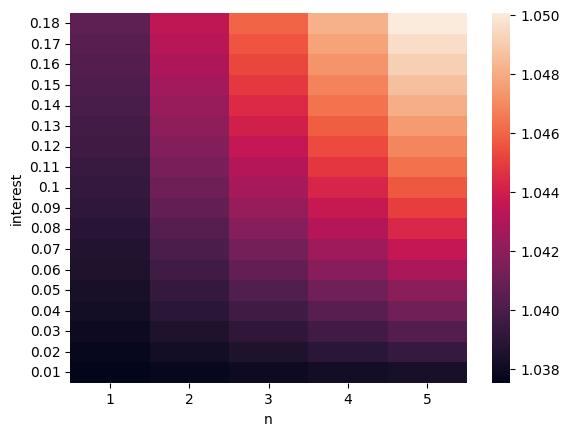

In [41]:
heatmap_plot = pd.DataFrame({'interest': heatmap['interest'], 'n': heatmap['n'], 'value_added': heatmap['value_added']})
data_pivoted = heatmap_plot.pivot("interest", "n", "value_added")
data_pivoted = data_pivoted.sort_values('interest', ascending=[False])
ax = sns.heatmap(data_pivoted)
plt.show()

## Interpretabilidad global

In [42]:
####################################################### LASSO
####################################################### LASSO

lasso              = Lasso(alpha=0.005)
lasso.fit(X_train, y_train)
predictions_lasso = lasso.predict(X_test)
roc_auc           = roc_auc_score(y_test, predictions_lasso)
coefficients      = lasso.coef_
magnitudes        = abs(coefficients)
df_coeffs         = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients, 'Magnitude': magnitudes})
df_coeffs         = df_coeffs.sort_values(by='Magnitude', ascending=False)
df_coeffs         = df_coeffs.reset_index(drop=True)

print("ROC AUC score:", roc_auc)
print(df_coeffs.loc[df_coeffs['Magnitude']>0,])

ROC AUC score: 0.706226319391565
                                     Feature  Coefficient  Magnitude
0                           facebook_profile     0.047954   0.047954
1                                  score_1_1    -0.040868   0.040868
2                                  score_1_3    -0.029252   0.029252
3                                  score_1_6     0.025624   0.025624
4                                  score_1_4     0.019809   0.019809
5   external_data_provider_email_seen_before    -0.018397   0.018397
6                                  score_1_5     0.012585   0.012585
7                          email_outlook.com     0.011919   0.011919
8                                     income    -0.009061   0.009061
9                                  score_1_2     0.008970   0.008970
10                 marketing_channel_Website     0.006096   0.006096
11                                 score_2_2    -0.005980   0.005980
12                                   score_3     0.005899   0.005899
1

In [43]:
################ Entrenamos un modelo no interpretable (el XGB)
################ Sin estandarizar para poder interpretar mejor

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)


model_train    = xgb.XGBClassifier(n_estimators=200, max_depth=2, learning_rate = 0.1)
loaded_xgb     = model_train.fit(X_train, y_train)
prediction_xgb = loaded_xgb.predict_proba(X_test)    

#umbral      = np.mean(y_train)
umbral      = 0.2

roc         = roc_auc_score(y_test, prediction_xgb[:,1])
accuracy    = accuracy_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
precision   = precision_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
recall      = recall_score(y_test, np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
f1          = f1_score(y_test,np.where(prediction_xgb[:,1] > umbral, 1, 0)) 
print('roc:{}, accuracy:{}, precision:{}, recall:{}, f1:{}'.format(roc, accuracy, precision, recall, f1))   

roc:0.725155308770422, accuracy:0.7426039046592406, precision:0.3251231527093596, recall:0.5307017543859649, f1:0.40322132740905303


ROC AUC score: 0.6407970548296924


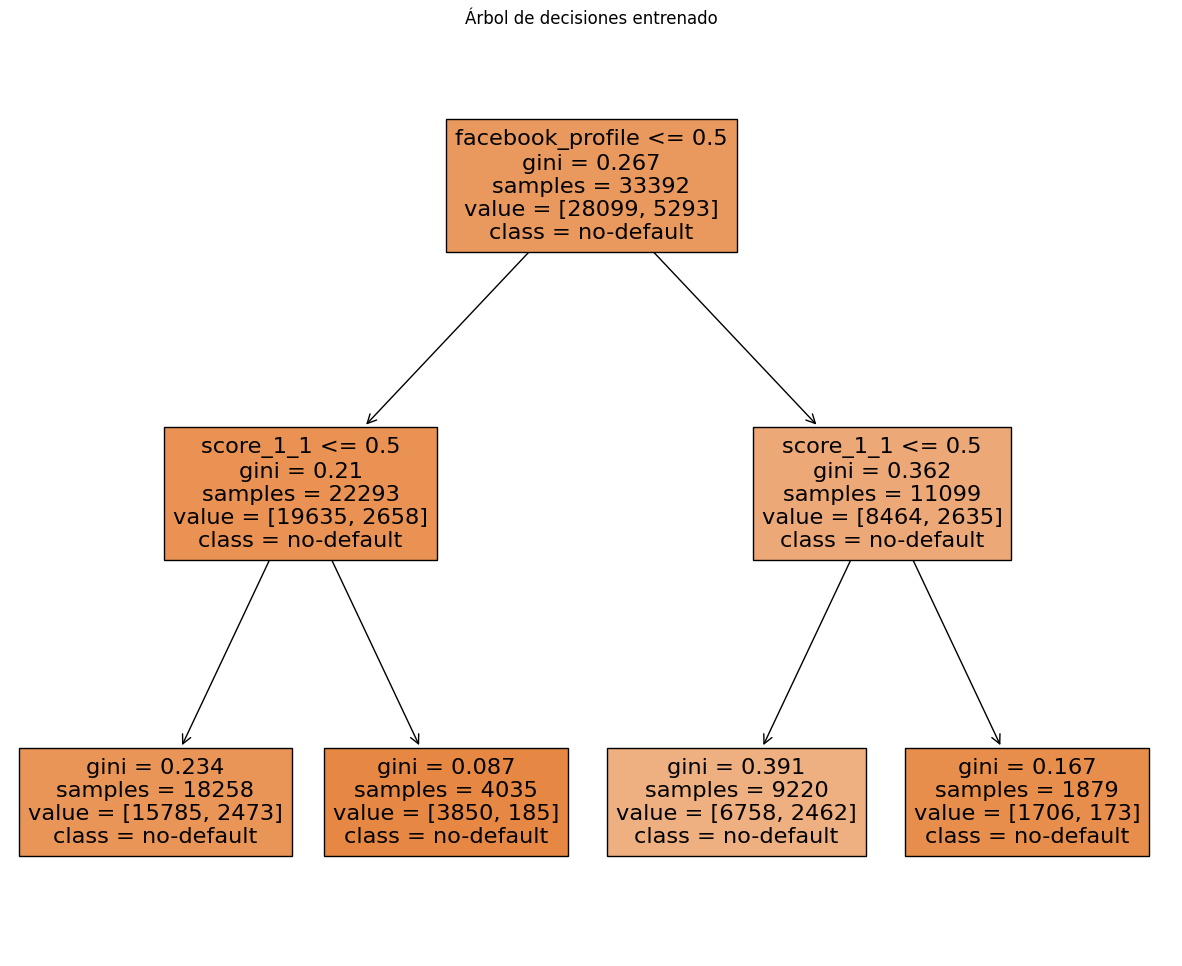

In [44]:
####################################################### Simple Tree
####################################################### Simple Tree
model            = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
loaded_arbol     = model.fit(X_train, y_train)
predictions_tree = loaded_arbol.predict_proba(X_test) 
roc_auc          = roc_auc_score(y_test, predictions_tree[:,1])
class_names      = ["no-default", "default"]


plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura (en pulgadas)
plt.rcParams.update({'font.size': 10})  # Ajusta el tamaño de fuente
plot_tree(loaded_arbol, filled=True, feature_names=X.columns, class_names=class_names)
print("ROC AUC score:", roc_auc)

plt.title("Árbol de decisiones entrenado")
plt.show()



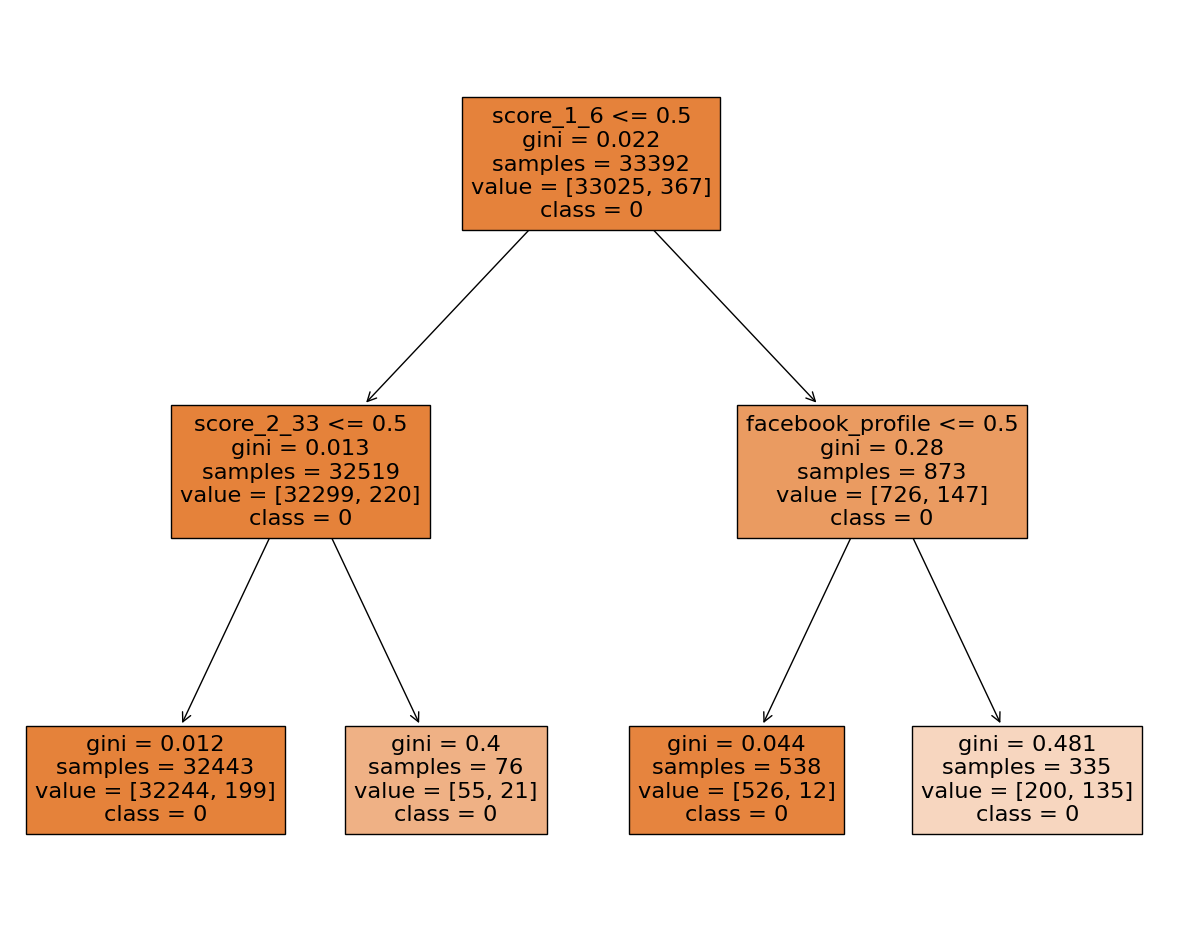

In [45]:
####################################################### Surrogate
####################################################### Surrogate

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


surrogate    = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
loaded_arbol = surrogate.fit(X_train, loaded_xgb.predict(X_train))
class_names  = [str(x) for x in surrogate.classes_]

# Visualiza el árbol
plt.figure(figsize=(15, 12))  # Ajusta el tamaño de la figura (en pulgadas)
plt.rcParams.update({'font.size': 10})  # Ajusta el tamaño de fuente

plot_tree(surrogate, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


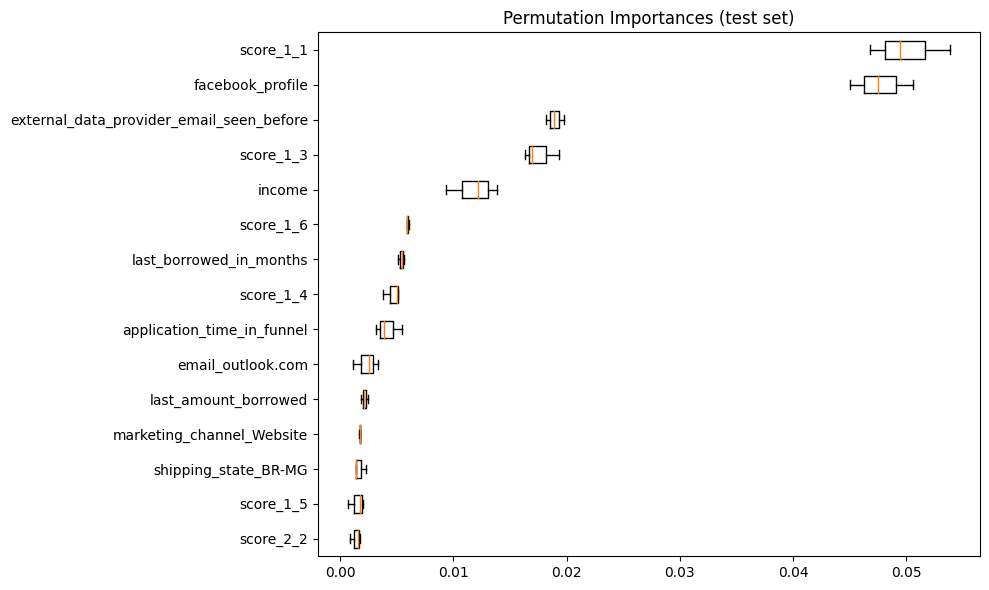

In [46]:
####################################################### Feature Importance
####################################################### Feature Importance

result = permutation_importance(loaded_xgb, X_test, y_test, n_repeats=3, scoring="roc_auc")
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10, 6))
top_15_importances = result.importances[sorted_idx][-15:]
top_15_labels = X.columns[sorted_idx][-15:]
ax.boxplot(top_15_importances.T, vert=False, labels=top_15_labels)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


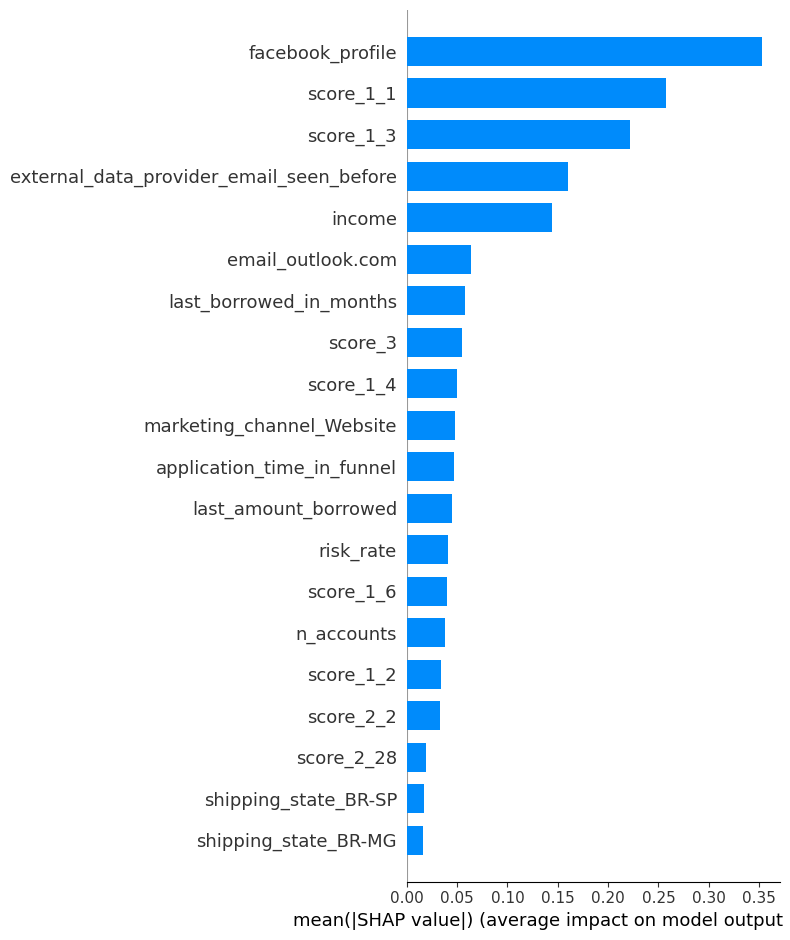

In [47]:
####################################################### SHAP
####################################################### SHAP

explainer = shap.TreeExplainer(loaded_xgb)
X_test_aux=pd.DataFrame(X_test)
X_test_aux.columns=df.drop(['target_default'], axis = 1).columns
shap_values = explainer.shap_values(X_test_aux)
shap.summary_plot(shap_values, X_test_aux, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


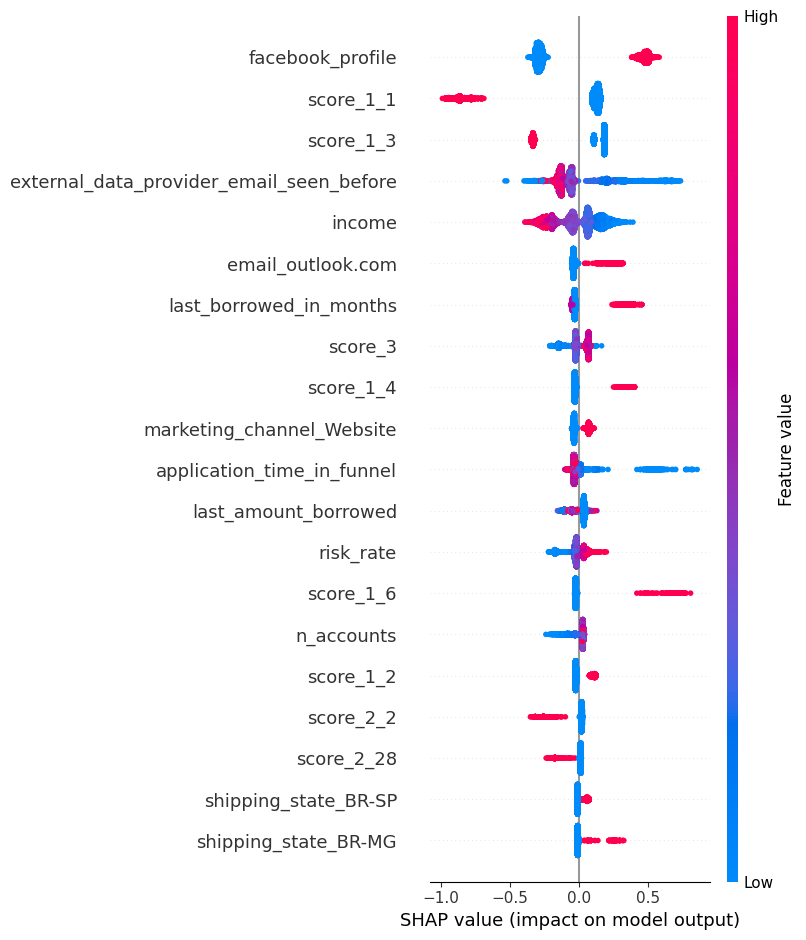

In [48]:
shap.summary_plot(shap_values, X_test_aux)

## Interpretabilidad variable a variable

Tanto los gráficos de Dependencia Parcial (PDP) como los de Efectos Acumulados Locales (ALE) son técnicas de interpretación de modelos que buscan entender el efecto de una característica individual en la predicción de un modelo. Sin embargo, hay algunas diferencias clave entre los dos.

**PDP (Partial Dependence Plot)**:
Los gráficos PDP promedian el efecto de una característica en todas las observaciones. No considera la distribución de interacciones de características.
Los PDP pueden ser engañosos cuando las características están correlacionadas. La razón es que los PDP consideran todas las combinaciones posibles de características, incluso aquellas que son improbables o incluso imposibles en la vida real. Por ejemplo, si estás analizando datos de viviendas y tienes dos características altamente correlacionadas como "tamaño de la casa" y "número de habitaciones", el PDP consideraría combinaciones improbables como una casa grande con una sola habitación.

**ALE (Accumulated Local Effects)**:
Los gráficos ALE, por otro lado, solo consideran las combinaciones de características que realmente ocurren en los datos, lo que evita el problema anterior. Esto se logra al calcular los efectos locales y luego acumularlos a lo largo de la distribución de la característica de interés.
Los gráficos ALE suelen ser más confiables cuando hay correlaciones entre las características.
Sin embargo, los gráficos ALE pueden ser más difíciles de calcular y menos intuitivos para interpretar que los PDP, especialmente para características categóricas o cuando se desean visualizar interacciones entre múltiples características.
En resumen, los PDP y los ALE son dos herramientas útiles para la interpretación de modelos, pero es importante entender sus diferencias y utilizar la herramienta que sea más apropiada para tu situación y tus datos.

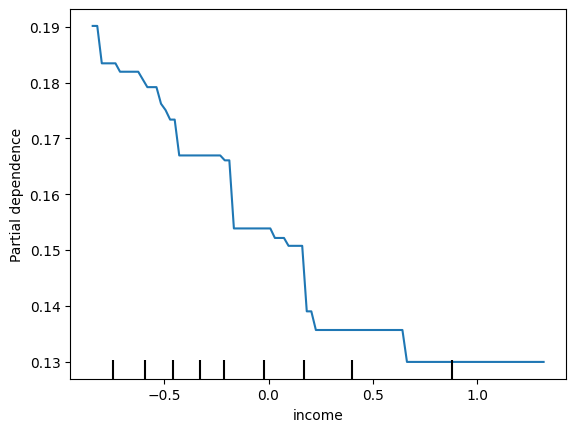

In [49]:
from sklearn.inspection import PartialDependenceDisplay

pdp = PartialDependenceDisplay.from_estimator(loaded_xgb, X_test, ['income'])
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


def interaction(var_x1, var_x2):
    df_x1 = pd.DataFrame(X_test[var_x1])
    x1    = df_x1[var_x1].value_counts().index.values
    x1.sort()
    if len(x1) > 20:
        x1 = np.percentile(x1, np.arange(0, 100, 5))[1:]  # deciles

    df_x2 = pd.DataFrame(X_test[var_x2])
    x2    = df_x2[var_x2].value_counts().index.values
    x2.sort()
    if len(x2) > 20:
        x2 = np.percentile(x2, np.arange(0, 100, 10))[1:]  # deciles

    mesh         = np.array(np.meshgrid(x1, x2))
    combinations = mesh.T.reshape(-1, 2)
    df_list      = []  # list to store dataframes before concatenation

    for i in range(0, len(combinations)):
        x1_loop            = combinations[i][0]
        x2_loop            = combinations[i][1]
        X_test_pdp         = X_test.copy()
        X_test_pdp[var_x1] = x1_loop
        X_test_pdp[var_x2] = x2_loop
        predictions_loop   = loaded_xgb.predict_proba(X_test_pdp)[:, 1].mean()
        df_list.append(pd.DataFrame({'x1': [x1_loop], 'x2': [x2_loop], 'pdp': [predictions_loop]}))  # append to list

    df_inter = pd.concat(df_list, ignore_index=True)  # concatenate all dataframes in the list
    return [df_inter, x2]


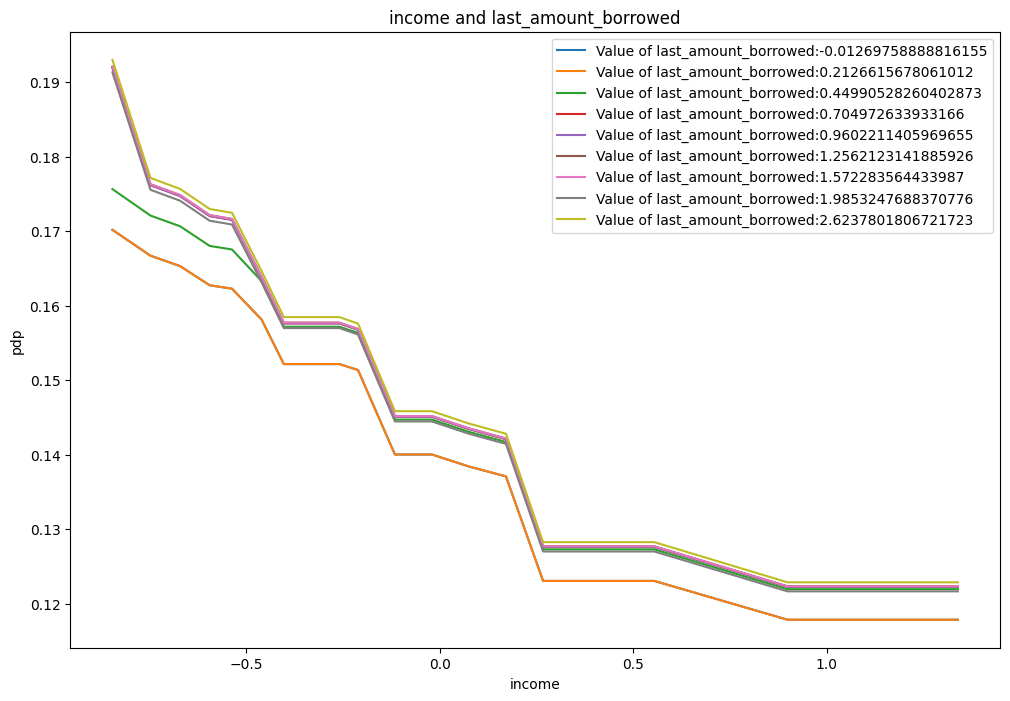

In [51]:
var_x1       = "income"
var_x2       = "last_amount_borrowed"
#var_x2      = "facebook_profile"
#var_x2      = "score_1_1"

df_inter, x2 = interaction(var_x1,var_x2)


fig, ax = plt.subplots(figsize=(12, 8))
for value_x2 in x2:
    ax.plot(df_inter[df_inter.x2 == value_x2].x1, df_inter[df_inter.x2 == value_x2].pdp, 
            label='Value of ' + var_x2  +':'+ str(value_x2))
ax.set_xlabel(var_x1)
ax.set_ylabel("pdp")
ax.set_title(var_x1 + " and " + var_x2)
ax.legend()
plt.savefig('Feature_Interaction_' + var_x1 + "_" + var_x2 + '.png')

## Interpretabilidad local

In [52]:
import lime
import lime.lime_tabular
import shap

In [53]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train), feature_names=X.columns, class_names=["No Default", "Default"])

# Función para obtener explicaciones Lime
def lime_explanation(instance):
    exp = explainer.explain_instance(instance, loaded_xgb.predict_proba, num_features=len(X.columns))
    exp.show_in_notebook()

# Obtener explicaciones Lime para una instancia de préstamo específica
array_aux = np.array(X_test)

loan_instance = array_aux[0]  # Cambia el índice (0) para elegir otra instancia
lime_explanation(loan_instance)

In [54]:


# Necesario para la visualización de SHAP
shap.initjs()

# Crear un objeto Tree explainer
explainer = shap.TreeExplainer(loaded_xgb)

# Calcula los valores SHAP
shap_values = explainer.shap_values(X_test)

# Dibuja el diagrama de fuerzas de SHAP para el primer préstamo
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Deep learning

In [55]:
X = df.drop('target_default', axis=1)
y = df['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=0)


scaler = StandardScaler()
scaler.fit(X_train)
X_train        = scaler.transform(X_train)
X_test         = scaler.transform(X_test)
X_train_train  = scaler.transform(X_train_train)   
X_val          = scaler.transform(X_val)  


X_val         = np.array(X_val)
y_val         = np.array(y_val)     
X_train_train = np.array(X_train_train)
y_train_train = np.array(y_train_train)  
X_test        = np.array(X_test)
y_test        = np.array(y_test)  



In [56]:
n_cols = X_train_train.shape[1]

metrics = keras.metrics.AUC(name='auc')

model = Sequential()
model.add(Dense(64, input_dim=n_cols, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.BinaryCrossentropy(),metrics=metrics)

In [57]:
EPOCHS = 100
BATCH_SIZE = 2000
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_auc', verbose=1,patience=10,mode='max',restore_best_weights=True)

model_nn = model
model_nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6784      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [58]:
loaded_neural_net=model_nn.fit(X_train_train, y_train_train, epochs=EPOCHS,batch_size=BATCH_SIZE, callbacks=[early_stopping], validation_data=(X_val, y_val))   

predictions = model_nn.predict(X_test)
print(round(roc_auc_score(y_test, predictions),4))

Epoch 1/100
14/14 [==============================] - 1s 23ms/step - loss: 0.8191 - auc: 0.4974 - val_loss: 0.6245 - val_auc: 0.4761
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6017 - auc: 0.4904 - val_loss: 0.5025 - val_auc: 0.4830
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5379 - auc: 0.5042 - val_loss: 0.4532 - val_auc: 0.5435
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.5126 - auc: 0.5219 - val_loss: 0.4397 - val_auc: 0.6053
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4977 - auc: 0.5447 - val_loss: 0.4332 - val_auc: 0.6385
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4880 - auc: 0.5564 - val_loss: 0.4283 - val_auc: 0.6566
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4734 - auc: 0.5783 - val_loss: 0.4200 - val_auc: 0.6684
Epoch 8/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4680 

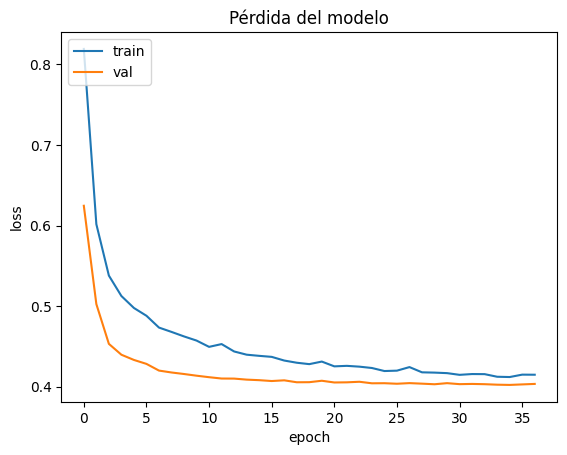

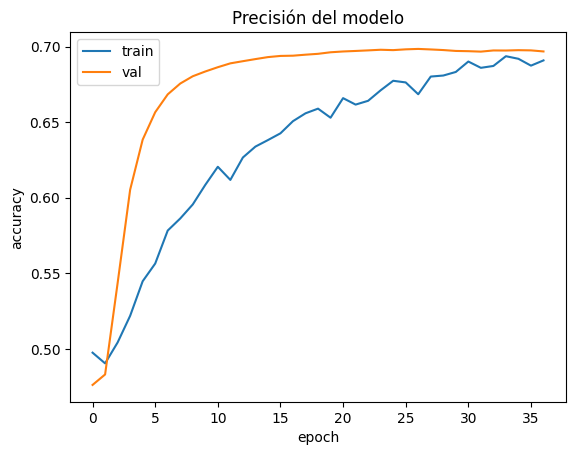

In [59]:
# Vemos el historial de la función pérdida tanto para el entrenamiento (train) como para validacion
plt.plot(loaded_neural_net.history['loss'])
plt.plot(loaded_neural_net.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Vemos el historial de la precisión tanto para el entrenamiento (train) como para validacion
plt.plot(loaded_neural_net.history['auc'])
plt.plot(loaded_neural_net.history['val_auc'])
plt.title('Precisión del modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [60]:
prior_unos= 0.1

roc         = roc_auc_score(y_test, predictions) 
accuracy    = accuracy_score(y_test, np.where(predictions > prior_unos, 1, 0)) 
precision   = precision_score(y_test, np.where(predictions > prior_unos, 1, 0)) 
recall      = recall_score(y_test, np.where(predictions > prior_unos, 1, 0)) 
f1          = f1_score(y_test,np.where(predictions > prior_unos, 1, 0)) 

print('roc:{}, accuracy:{}, precision:{}, recall:{}, f1:{}'.format(roc, accuracy, precision, recall, f1))  

roc:0.7010310357855198, accuracy:0.371900826446281, precision:0.19576138147566718, recall:0.9115497076023392, f1:0.32230550529852675


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


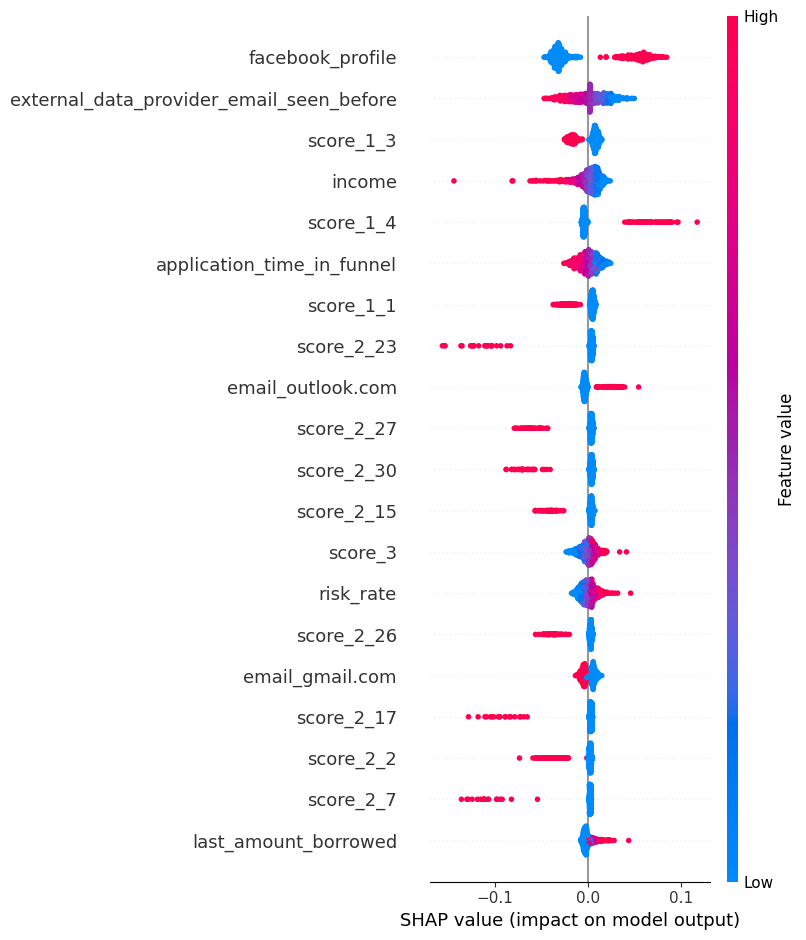

In [61]:
max_shap  = 800
X_dist    = X_train[0:max_shap]
X_test_exp= X_test[0:max_shap]
explainer = shap.DeepExplainer(model_nn, X_dist)
shap_values = explainer.shap_values(X_test_exp)
X_test_aux  = pd.DataFrame(X_test[0:max_shap])
X_test_aux.columns = X.columns
shap_values_new    = shap_values[0]
shap.summary_plot(shap_values_new, X_test_aux, color='auto')

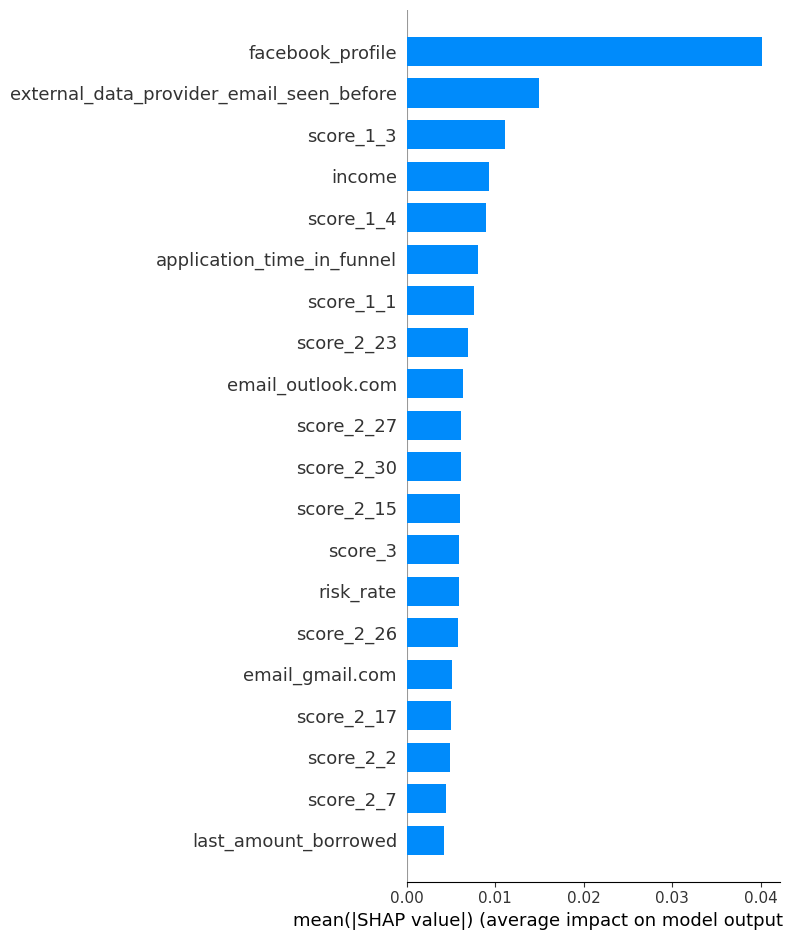

In [62]:
shap.summary_plot(shap_values_new, X_test_aux, plot_type="bar")